# Perfil dos consumidores do ecommerce da Everything Plus

# Sumário
* [1. Introdução](#intro)
* [2. Inicialização](#inicio)
* [3. Carregando dados](#carregamento)
* [4. Pré processamento de dados](#data_processing)
    * [4.1 Estudando tipos de dados](#tipos)
    * [4.2 Estudando dados duplicados](#duplicados)
    * [4.3 Identificando outliers](#outliers)
    * [4.4 Enriquecendo os dados](#enriquecendo)
* [5. Análise exploratória dos dados](#data_analysis)
* [6. Segmentação dos dados](#segmentação)
* [7. Formando e testando hipóteses](#hipóteses)
* [8. Apresentação](#apresentação)
* [9. Conclusão](#conclusão)

## Introdução

Minha tarefa é identificar o perfil dos consumidores do ecommerce da Everything Plus, uma loja online que vende utensílios domésticos, para desenvolver ofertas mais personalizadas para diferentes usuários.

## Inicialização

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from math import sqrt

## Carregando dados

In [3]:
df = pd.read_csv(r'/datasets/ecommerce_dataset_us.csv', delimiter='\t')

## Pré processamento de dados

- `InvoiceNo` — identificador de pedido
- `StockCode` — identificador de item
- `Description` — nome de item
- `Quantity` - quantidade de itens
- `InvoiceDate` — data do pedido
- `UnitPrice` — preço por item
- `CustomerID` - identificador do cliente

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,11/29/2018 08:26,7.65,17850.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,11/29/2018 08:26,4.25,17850.0
7,536366,22633,HAND WARMER UNION JACK,6,11/29/2018 08:28,1.85,17850.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,11/29/2018 08:28,1.85,17850.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,11/29/2018 08:34,1.69,13047.0


Aparentemente está tudo ok.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Existem valores ausentes.

Temos 541909 linhas e 7 colunas.

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quanto menor o desvio padrão (std) mais homogêneos são os dados

In [7]:
df.duplicated().sum()

5268

Vou remover as duplicadas abaixo.

Possui 541909 linhas e 7 colunas.

- Possui dados ausentes nas colunas `Description` e `CustomerID`
- Possui 5268 dados duplicados
- O nome das colunas está ok
- O tipo da coluna `InvoiceDate` deveria ser do tipo datetime

Nas próximas etapas irei tratar os problemas.

### Estudando tipo de dados

In [8]:
# Mudando o tipo da coluna para datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# Conferindo de funcionou

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


### Estudando dados duplicados

É bem provável que as linhas duplicadas sejam um erro de registro no sistema, vou descartá-los.

In [10]:
# Excluindo duplicatas

df=df.drop_duplicates()

In [11]:
# Conferindo se funcionou

df.duplicated().sum()

0

### Identificando outliers

- Quantity

Text(0, 0.5, 'Frequencia')

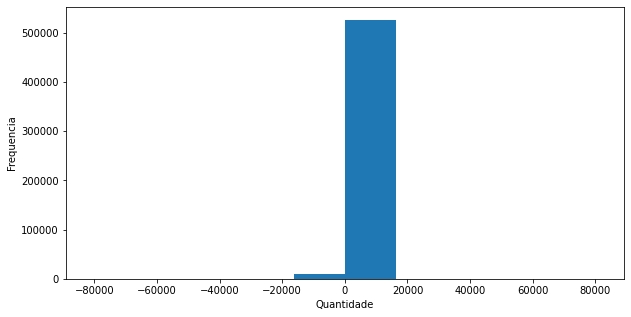

In [12]:
# Histograma da quantidade de itens comprados
plt.figure (figsize = (10,5))
plt.hist(df['Quantity'], bins=10) 
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')

Temos pedidos com menos do que 0 itens. Vou excluí-los, pois não existe compras com menos menos que 0 itens.

In [13]:
df.drop(df[df['Quantity']<=0].index, inplace=True)

In [14]:
print(np.percentile(df['Quantity'], [0, 50, 99]))

[  1.   4. 100.]


In [15]:
# Apagando quantidades de compra maiores do que 100.
df.drop(df[df['Quantity']>100].index, inplace=True)

Text(0, 0.5, 'Frequencia')

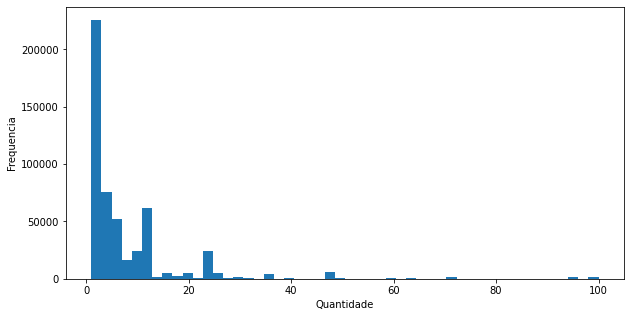

In [16]:
plt.figure (figsize = (10,5))
plt.hist(df['Quantity'], bins=50) 
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')

In [17]:
print(np.percentile(df['Quantity'], [90, 95, 99]))

[20. 25. 72.]


Menos que 10% dos usuários compraram mais que 20 itens, menos que 5% dos usuários fez compraram mais do que 25 itens e menos que 1% compraram mais que 72 itens; portanto vou considerar que pedidos com muitos itens são pedidos com mais de 25 itens.

- UnitPrice

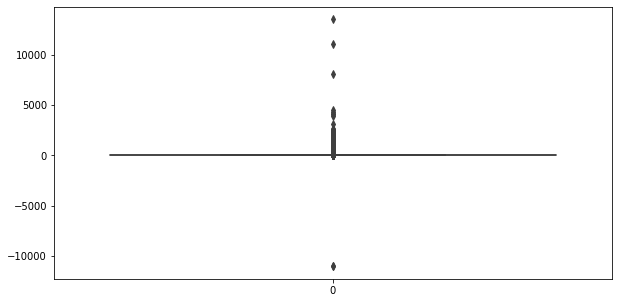

In [18]:
# Boxplot do preço unitário dos itens
plt.figure (figsize = (10,5))
boxplot_atipico = sns.boxplot(data=df['UnitPrice'])
plt.show()

Também vou excluir preços menores que 0, pois não existem compras com valor menor que 0.

Ao excluir itens de quantidade negativa posso ter retirado grande parte, mas pode haver algum erro de digitação no preço do produto de alguma compra, pois isso, vamos exluí-lo.

In [19]:
df.drop(df[df['UnitPrice']<=0].index, inplace=True)

In [20]:
print(np.percentile(df['UnitPrice'], [0, 50, 99]))

[1.000e-03 2.100e+00 1.698e+01]


In [21]:
# Excluindo preços maiores do que 3000.
df.drop(df[df['UnitPrice']>3000].index, inplace=True)

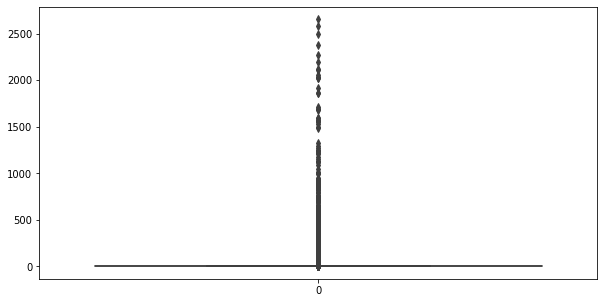

In [22]:
# Boxplot do preço unitário dos itens depois da limpeza
plt.figure (figsize = (10,5))
sns.boxplot(data=df['UnitPrice'])
plt.show()

Agora vemos que em comparação com o gráfico anterior, não temos valores atípicos.

### Enriquecendo os dados

In [23]:
# Criando colunas de mês
df['Month']=df['InvoiceDate'].dt.month

In [24]:
# Criando coluna de Totais
df['Total'] = df['UnitPrice'] * df['Quantity']

<AxesSubplot:xlabel='CustomerID', ylabel='Total'>

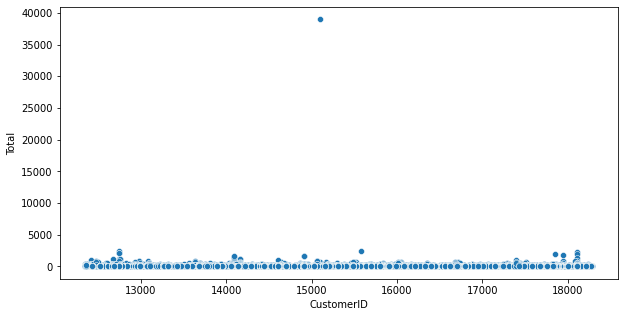

In [25]:
plt.figure (figsize = (10,5))
sns.scatterplot(data=df, x='CustomerID', y='Total')

Vemos que existe um valor atípico no valor total da compra acima de 3500 - vou excluir para não afetar a análise.

In [26]:
# Excluindo onde o valor total da compra foi aproximadamente 40000
df.drop(df[df['Total']>35000].index, inplace=True)

<AxesSubplot:xlabel='CustomerID', ylabel='Total'>

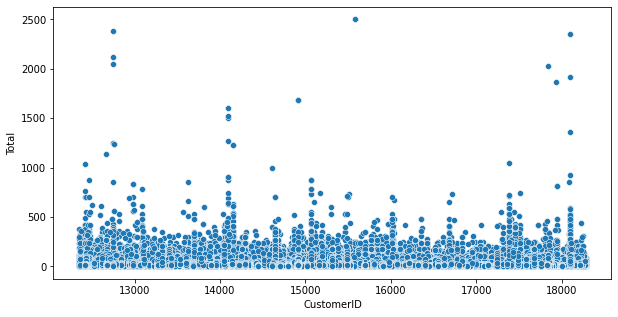

In [27]:
plt.figure (figsize = (10,5))
sns.scatterplot(data=df, x='CustomerID', y='Total')

Agora, em comparação com o gráfico anterior, vemos que não existem valores atípicos.

## Análise exploratória dos dados

- Correlação

In [28]:
corr = df.corr()
corr = corr.drop('CustomerID')
corr

,Quantity,UnitPrice,CustomerID,Month,Total
Quantity,1.000000,-0.055303,-0.088762,-0.011428,0.480762
UnitPrice,-0.055303,1.000000,-0.015725,-0.001517,0.585293
Month,-0.011428,-0.001517,0.027871,1.000000,-0.003880
Total,0.480762,0.585293,-0.078603,-0.003880,1.000000


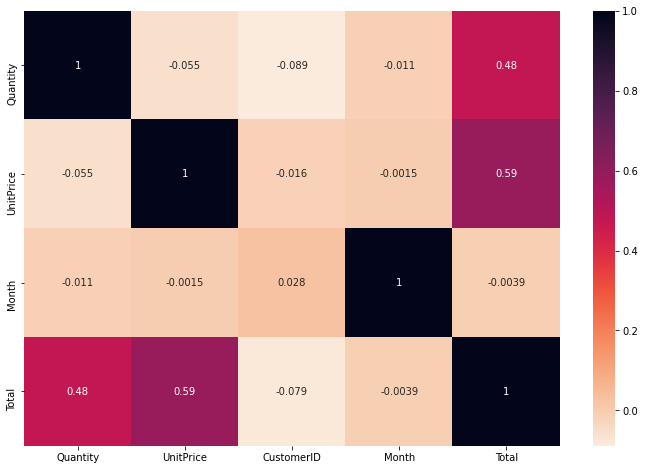

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap=sns.cm.rocket_r)
plt.show()

Podemos observar que não temos correlações fortes, apenas o total com a quantidade e o total com o preço são mais fortes, pois a coluna total se originou dessas 2 colunas. 

- Calculando percentis

In [30]:
print(np.percentile(df['UnitPrice'], [90, 95, 99]))

[ 7.95  9.95 16.98]


Menos que 10% dos usuários gastaram mais que 7.95, menos que 5% dos usuários gastou mais do que 9.95 e menos que 1% gastou mais que 16.98; portanto vou considerar produtos com preços maiores que 9.95 como um produto caro, enquanto produtos com preços menores que 9.95 vou considerar um produto mais barato.

In [31]:
print(np.percentile(df['Quantity'], [90, 95, 99]))

[20. 25. 72.]


Quantidades maiores que 25 vou considerar uma compra com muitos produtos, e menores que 25, compras com poucos produtos.

## Segmentação dos dados

**Segmentando os usuários com base no histórico de compras.**

- Padronizando os dados

In [32]:
scaler = StandardScaler()

In [33]:
X_sc = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
df_standard=pd.DataFrame()
df_standard['Quantity']=X_sc[:,0]
df_standard['UnitPrice']=X_sc[:,1]

- Machine learning para dividir os tipos de compras em n números

In [34]:
max_clusters = 10
kmeans = [KMeans(n_clusters=i) for i in range(1, max_clusters+1)]

In [ ]:
score = [kmeans[i].fit(df_standard).score(df_standard) for i in range(len(kmeans))]

In [ ]:
plt.plot(range(1, max_clusters+1), score)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

O ponto de "cotovelo" indica o número ideal de clusters, no caso 3.

In [ ]:
kmeans= KMeans(n_clusters=3 , init='k-means++', n_init=10, max_iter=300).fit(df_standard) 

In [ ]:
kmeans.fit(df_standard)

In [ ]:
labels = kmeans.fit_predict(X_sc)

df['agrupamento'] = labels

In [ ]:
df.groupby(['agrupamento']).mean()

Sobre os grupos:

- Grupo 0: Este grupo possui uma quantidade de 5.958638 e um preço unitário de 3.648292. Os valores estão abaixo da média, então esse grupo representa clientes com compras de baixa quantidade e baixo valor unitário.

- Grupo 1: Este grupo possui uma quantidade de 57 e um preço unitário de 1.549896. A quantidade é significativamente maior do que os outros grupos, sugerindo que este grupo representa clientes com compras de alta quantidade, mas de baixo valor unitário, provavelmente tendem a comprar maiores quantidades de produtos baratos.

- Grupo 2: Este grupo possui uma quantidade de 1 e um preço unitário de 989. Este grupo representa clientes com compras de baixa quantidade e altíssimo valor unitário, talvez devido a um valor atípico, sugerindo que este grupo representa clientes com compras de baixa quantidade, mas de alto valor unitário, provavelmente tendem a comprar menores quantidade de produtos caros.

In [ ]:
df.groupby('agrupamento')['CustomerID'].count()

In [ ]:
df.groupby('agrupamento')['Total'].sum()

In [ ]:
df.groupby('agrupamento')['Total'].sum() / df.groupby('agrupamento')['CustomerID'].count()

O grupo com maior renda gerada é o 2. Como vemos, é o grupo com menores quantidades e maior renda, portanto a equipe de marketing pode tentar encontrar uma oportunidade em direcionar mais o marketing a compradores de poucos itens com o valor mais elevado, ao invés de compra em atacado, por exemplo. 

Sobre o mês, o grupo com maior renda é o que aparentemente faz compras no mês 9/10, o que pode significar que os meses finais são os melhores em relação às compras - vamos olhar a distribuição de acordo com o meses.

- Vamos dar uma olhada na distribuição de acordo com o tempo

In [ ]:
df_grouped = df.groupby('Month')['Quantity'].count().reset_index()

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='Month', y='Quantity')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês')
plt.show()

Podemos promover determinados tipos de itens em determinadas épocas do ano. Como vemos, os últimos meses do ano são os que mais vendem, então podemos dar mais atenção para itens de eventos de final de ano, como natal, ano novo, Black Friday por exemplo.

- RFM (Recência-Frequência-Monetização)

In [ ]:
data_ultima_compra = df['InvoiceDate'].max() + pd.DateOffset(days=1)

In [ ]:
# Calcular a data mais recente para o cálculo da recência
data_atual = pd.to_datetime('2023-10-02')

# Calcular Recência
df['Recencia'] = (data_ultima_compra - df['InvoiceDate']).dt.days

# Calcular Frequência
frequencia = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequencia.rename(columns={'InvoiceNo': 'Frequencia'}, inplace=True)

# Calcular Valor Monetário
valor_monetario = df.groupby('CustomerID')['Total'].sum().reset_index()
valor_monetario.rename(columns={'TotalValue': 'ValorMonetario'}, inplace=True)

# Combinar os resultados em um DataFrame
resultado = pd.merge(df[['CustomerID', 'Recencia']], frequencia, on='CustomerID')
resultado = pd.merge(resultado, valor_monetario, on='CustomerID')
resultado = resultado.drop_duplicates()

# Exibir os resultados
print(resultado)

In [ ]:
resultado = pd.merge(resultado, df, on='CustomerID')

In [ ]:
resultado.groupby('agrupamento')[['Recencia_x', 'Frequencia', 'Total_x']].mean()

- Maior recência: grupo 1
- Maior frequência: grupo 2
- Maior renda: grupo 2

O grupo 1 tem a maior recência , porém baixa frequência e valor monetário baixo. É possível que esse grupo seja de clientes que acabaram de fazer sua primeira compra na loja, então a equipe de marketing vão querer levá-lo em uma elaborada jornada de boas-vindas para garantir que ele aproveite ao máximo seu investimento, que tenha todas as suas perguntas respondidas e que ele aprende um pouco mais sobre a loja no processo.

Para o Grupo 2 obtemos um valor monetário maior e frequência também. Muitas vezes os clientes desse grupo gastavam dinheiro na loja e faziam compras, mas já fazia muito tempo que não faziam uma compra. Eles podem querer a partir de seu histórico de compras enviar a eles uma oferta relevante e valiosa para um engajamento repetido - como visto anteriormente, esses clientes compram em pequenas quantidades, mas comrpam rodutos caros.

## Formando e testando hipóteses

1. Hipótese: As vendas aumentam no final do ano (últimos 3 meses) por conta de feriados/férias
    - Validação: Criar gráfico de barras de compras por mês

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='Month', y='Quantity')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês')
plt.show()

Assim como vimos anteriormente, as vendas aumentam significamente nos últimos 3 meses do ano.

2. Hipótese: A maior parte dos clientes compram em pequenas quantidades.
    - Validação: Histograma de Quantity

In [ ]:
plt.figure (figsize = (10,5))
plt.hist(df['Quantity'], bins=50) 
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')

Como vemos no histograma, existem mais clientes que compram em pequenas quantidades do que clientes que compram em grandes quantidades.

3.  Hipótese: Os clientes que mais gastam são aqueles que compram em maiores quantidades
    - Validação: Olhar correlação entre coluna de Valor Total e Quantity

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap=sns.cm.rocket_r)
plt.show()

A correlação entre Valor Total e Quantidade é de 0.48, indicando uma correlação média - não necessariamente os clientes que compram em maiores quantidades são aqueles que gastam mais.

## Apresentação

Apresentação: <https://docs.google.com/presentation/d/12POC7kHZ0vZN8FWMtmNVwT0q34aDC7Nlpv4xhHSsjVo/edit?usp=sharing> 

## Conclusão

Iniciei importando as bibliotecas pandas, matplotlib, seaborn, numpy, sklearn (StandardScaler, KMeans), scipy e math.

**Em seguida, o pré processamento de dados, onde:**
- Mudei o tipo da coluna `InvoiceDate` para o tipo datetime
- Removi outliers
- Adicionei a coluna `Month`

**Na análise exploratória:**
- Pudemos observar que não temos correlações fortes, apenas o total com a quantidade e o total com o preço são mais fortes, pois a coluna total se originou dessas 2 colunas; mas não significa que necessariamente as maiores compras são de grandes quantidades ou de produtos mais caros.

**A partir da segmentação dos clientes, encontramos 3 grupos:**
- Grupo 0: Este grupo possui uma quantidade de 5.958638 e um preço unitário de 3.648292. Os valores estão abaixo da média, então esse grupo representa clientes com compras de baixa quantidade e baixo valor unitário.

- Grupo 1: Este grupo possui uma quantidade de 57 e um preço unitário de 1.549896. A quantidade é significativamente maior do que os outros grupos, sugerindo que este grupo representa clientes com compras de alta quantidade, mas de baixo valor unitário, provavelmente tendem a comprar maiores quantidade de produtos baratos.

- Grupo 2: Este grupo possui uma quantidade de 1 e um preço unitário de 989. Este grupo representa clientes com compras de baixa quantidade e altíssimo valor unitário, talvez devido a um valor atípico, sugerindo que este grupo representa clientes com compras de baixa quantidade, mas de alto valor unitário, provavelmente tendem a comprar menores quantidades de produtos caros.

O grupo com maior renda gerada é o 2.

**Sobre a análise de RFM:**
- Maior recência: grupo 1
- Maior frequência: grupo 2
- Maior renda: grupo 2

O grupo 1 tem a maior recência , porém baixa frequência e valor monetário baixo. É possível que esse grupo seja de clientes que acabaram de fazer sua primeira compra na loja, então a equipe de marketing vão querer levá-lo em uma elaborada jornada de boas-vindas para garantir que ele aproveite ao máximo seu investimento, que tenha todas as suas perguntas respondidas e que ele aprende um pouco mais sobre a loja no processo.

Para o grupo 2 obtemos um valor monetário maior e frequência também. Muitas vezes os clientes desse grupo gastavam dinheiro na loja e faziam compras, mas já fazia muito tempo que não faziam uma compra. Eles podem querer a partir de seu histórico de compras enviar a eles uma oferta relevante e valiosa para um engajamento repetido - como visto anteriormente, esses clientes compram em pequenas quantidades, mas comrpam rodutos caros.

**Ao testar nossas hipóteses, entedemos que:**
1. Hipótese: As vendas aumentam no final do ano (últimos 3 meses) por conta de feriados/férias
    - As vendas aumentam significamente nos últimos 3 meses do ano.
2. Hipótese: A maior parte dos clientes compram em pequenas quantidades.
    - Como vemos no histograma, existem mais clientes que compram em pequenas quantidades do que clientes que compram em grandes quantidades.
3.  Hipótese: Os clientes que mais gastam são aqueles que compram em maiores quantidades
    - A correlação entre Valor Total e Quantidade é de 0.48, indicando uma correlação média - não necessariamente os clientes que compram em maiores quantidades são aqueles que gastam mais.

**Conclusão geral**
- A equipe de marketing pode tentar encontrar uma oportunidade em direcionar mais o marketing a compradores de poucos itens com o valor mais elevado, ao invés de compra em atacado, por exemplo.
    - Incentivar a compra de itens mais caros, pois traz mais lucro para empresa em comparação com vários itens baratos.
- O marketing pode promover certos tipos de itens em determinadas épocas do ano, principalmente itens de eventos de final de ano, como natal, ano novo, etc. Também podem investir na BlackFriday (novembro), pois é um mês que mais vende no ano.
- Aumentar o número de itens com temas dos eventos de final de ano.